In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv(r'C:\Users\k18at\Downloads\archive (10)\bank_transactions_data_2.csv')
dataset.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,11-04-2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,04-11-2024 08:08
1,TX000002,AC00455,376.24,27-06-2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,04-11-2024 08:09
2,TX000003,AC00019,126.29,10-07-2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,04-11-2024 08:07
3,TX000004,AC00070,184.50,05-05-2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,04-11-2024 08:09
4,TX000005,AC00411,13.45,16-10-2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,04-11-2024 08:06


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
dataset['TransactionAmount']=dataset['TransactionAmount'].astype(int)

In [9]:
dataset.drop(['TransactionDate','PreviousTransactionDate'],axis=1,inplace=True)


In [11]:
dataset.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,TX000001,AC00128,14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21
1,TX000002,AC00455,376,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91
2,TX000003,AC00019,126,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35
3,TX000004,AC00070,184,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06
4,TX000005,AC00411,13,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40


In [13]:
TransacID = pd.get_dummies(dataset['TransactionID'],drop_first=True)
accountID = pd.get_dummies(dataset['AccountID'],drop_first=True)
TransacType = pd.get_dummies(dataset['TransactionType'],drop_first=True)
location = pd.get_dummies(dataset['Location'],drop_first=True)
deviceID = pd.get_dummies(dataset['DeviceID'],drop_first=True)
merchantID = pd.get_dummies(dataset['MerchantID'],drop_first=True)
channel = pd.get_dummies(dataset['Channel'],drop_first=True)
Customeroccupation = pd.get_dummies(dataset['CustomerOccupation'],drop_first=True)
IPAddress = pd.get_dummies(dataset['IP Address'],drop_first=True)

In [15]:
dataset.drop(['TransactionID','AccountID','TransactionType','Location','DeviceID','MerchantID','Channel','CustomerOccupation','IP Address'],axis=1,inplace=True)

In [17]:
dataset = pd.concat([dataset,TransacID,accountID,TransacType,location,deviceID,merchantID,channel,Customeroccupation,IPAddress],axis=1)

In [19]:
threshold = dataset['TransactionAmount'].quantile(0.95)  # Top 5% transactions as fraud
dataset['IsFraud'] = (dataset['TransactionAmount'] > threshold).astype(int)


In [21]:
print(dataset['IsFraud'].unique())  


[0 1]


In [25]:
dataset['IsFraud']

0       0
1       0
2       0
3       0
4       0
       ..
2507    0
2508    0
2509    0
2510    0
2511    0
Name: IsFraud, Length: 2512, dtype: int32

In [23]:
X = dataset.drop(columns=['IsFraud'])
y = dataset['IsFraud']


In [27]:
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TX000002,TX000003,TX000004,TX000005,TX000006,...,94.37.250.128,94.88.45.190,96.115.67.230,96.162.11.85,96.24.89.146,97.106.5.76,97.4.209.133,98.255.160.110,98.39.212.221,99.205.173.118
0,14,70,81,1,5112.21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,376,68,141,1,13758.91,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,126,19,56,1,1122.35,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,184,26,25,1,8569.06,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,26,198,1,7429.40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsFraud, dtype: int32

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_test_scaled

array([[-0.23554282, -0.9280733 , -1.23769515, ..., -0.03156758,
        -0.04995007, -0.03867187],
       [-0.72012213,  1.20297527,  0.66743517, ..., -0.03156758,
        -0.04995007, -0.03867187],
       [-0.9589505 ,  0.69825324, -1.10680833, ..., -0.03156758,
        -0.04995007, -0.03867187],
       ...,
       [-0.84126695, -0.9280733 ,  0.4347475 , ..., -0.03156758,
        -0.04995007, -0.03867187],
       [-0.19746874,  1.9320182 , -0.11788572, ..., -0.03156758,
        -0.04995007, -0.03867187],
       [ 0.0482822 ,  1.09081482, -0.83049172, ..., -0.03156758,
        -0.04995007, -0.03867187]])

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test_scaled)


In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9960238568588469
Confusion Matrix:
 [[478   0]
 [  2  23]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      0.92      0.96        25

    accuracy                           1.00       503
   macro avg       1.00      0.96      0.98       503
weighted avg       1.00      1.00      1.00       503



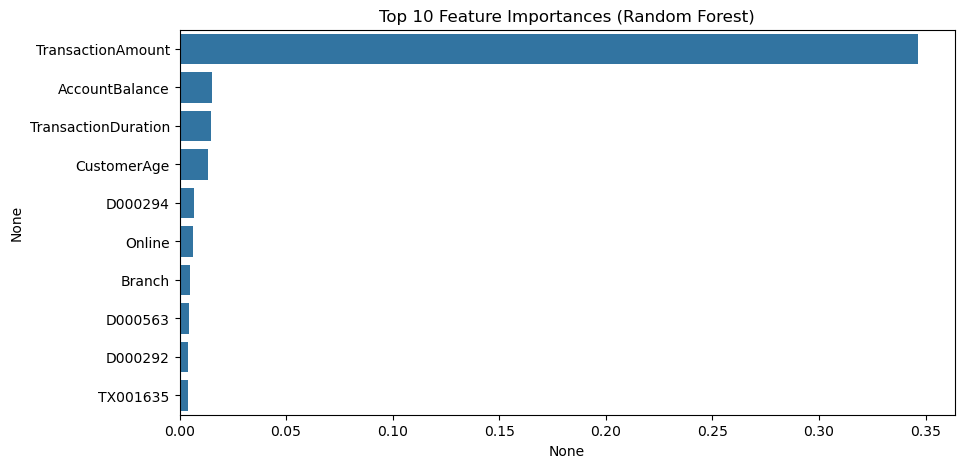

In [47]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

C:\Users\k18at\AppData\Local\Temp\ipykernel_16516\3928883662.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['blue', 'red'])


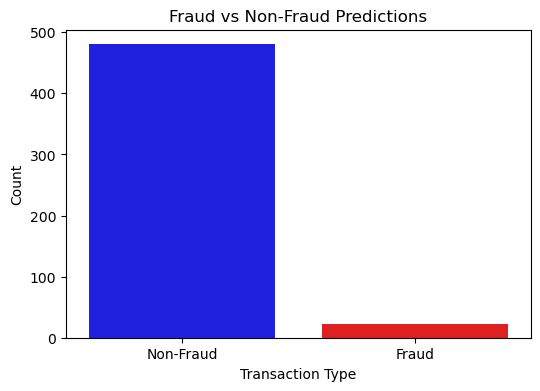

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


fraud_counts = pd.Series(y_pred).value_counts()


plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['blue', 'red'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Predictions")
plt.show()